In [20]:
#import libraries 

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)



# Read in the data 

df = pd.read_csv(r'C:\Users\Rasika\Desktop\movies.csv', encoding ='latin-1')

In [21]:
#Let's look at the data 
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [22]:
#Let's check for missing data 

for column in df.columns: 
    percent_missing = np.mean(df[column].isnull())
    print('{} - {}%'.format(column, round(percent_missing * 100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [23]:
#Data Types for our columns 
df.dtypes


budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [24]:
#Chagning data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [39]:
df.head(5)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


In [26]:
#New column from release column 

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [27]:
pd.set_option('display.max_rows', None)

# Finding Correlation of Multiple Variables with Gross 

## Predictions: Budget has high correlation, maybe company. 

My predictions: Director could have a semi high correlation 

Rating and Genre could have some uneven effect 

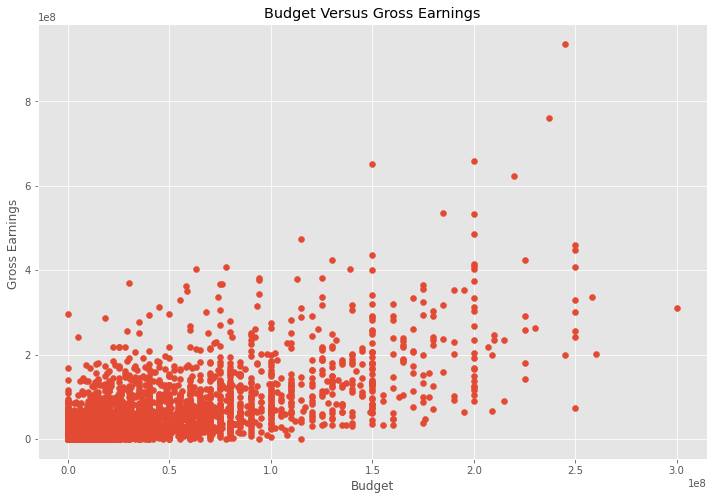

In [29]:
# Scatter plot with budget vs gross 

plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget Versus Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings ')
plt.show()

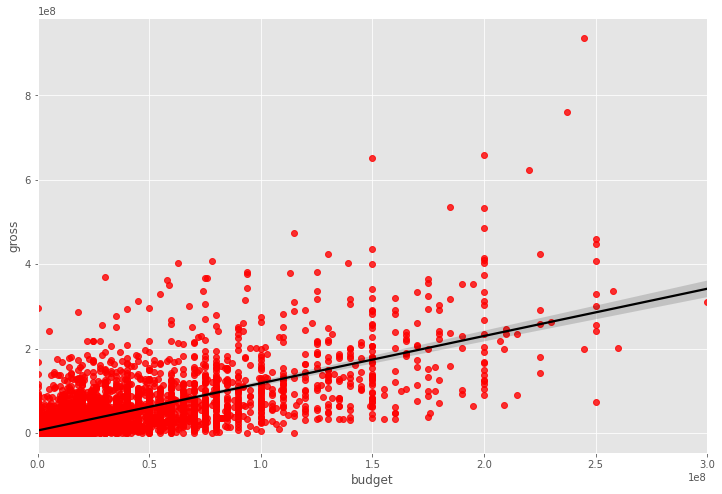

In [30]:
#Plotting Budget vs gross ussing seaborn 

sns.regplot(x= 'budget', y='gross', data=df, scatter_kws= {"color":"red"}, line_kws={"color":"black"})

In [31]:
#Let's start correlation
df.corr() # pearson, kendall, spearman 

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [32]:
# High correaltion between budget and gross 
# Also high correlation between vote and gross 


In [33]:
#Look at Company 
#Mapping the company to a numeric value 

df_numerized = df

for col in df_numerized.columns: 
    if(df_numerized[col].dtype == 'object'): 
        df_numerized [col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes 
        
df_numerized.head()
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


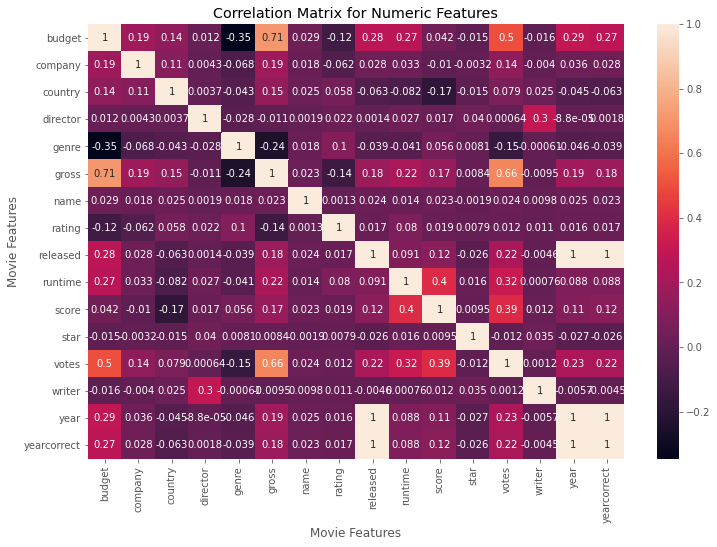

In [34]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [35]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


In [36]:
correlation_matrix = df_numerized.corr() 

corr_pairs = correlation_matrix.unstack() 
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.276635
             runtime        0.268226
             score          0.042145
             star          -0.015061
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.274820
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             released       0.027898
             runtime        0.033058
             score         -0.010426
 

In [37]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
country      score         -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
genre        company       -0.068330
company      genre         -0.068330
country      yearcorrect   -0.062707
yearcorrect  country       -0.062707
country      released      -0.062609
released     country       -0.062609
rating       company       -0.062250
company      rating        -0.062250
year         genre         -0.046259
genre        year          -0.046259
country      year          -0.045204
year         country       -0.045204
genre        country       -0.042793
c

In [38]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y